#### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()

Создайте датафреймы X и y из этих данных.

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
data = boston.data

In [12]:
X = pd.DataFrame(data, columns=feature_names)
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [13]:
target = boston.target

In [14]:
y = pd.DataFrame(target, columns=['price'])

In [15]:
y.head(10)

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)

In [23]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [24]:
X_test_scaled = scaler.fit_transform(X_test)

In [25]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [30]:
from sklearn.manifold import TSNE

In [31]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

In [32]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [33]:
X_train_tsne

array([[ 2.06456966e+01, -1.90324516e+01],
       [-1.01731615e+01,  2.24538398e+00],
       [-1.82979698e+01,  1.61975708e+01],
       [ 2.08739471e+01, -3.04970036e+01],
       [-8.07004738e+00, -1.65730190e+00],
       [-1.37758312e+01,  5.96054220e+00],
       [-1.23654423e+01,  4.51965141e+00],
       [-2.27855282e+01,  2.49101753e+01],
       [ 2.20735779e+01, -3.10544739e+01],
       [ 2.30734119e+01, -2.81187344e+01],
       [-1.29861460e+01,  4.51459265e+00],
       [-4.38451290e+00,  7.12765980e+00],
       [-3.87259632e-01,  9.02067661e+00],
       [ 2.17911167e+01, -2.82056236e+01],
       [-5.62543750e-01,  1.08374014e+01],
       [-9.24408340e+00, -4.66885710e+00],
       [-5.17522144e+00,  6.39879107e-01],
       [-1.90806427e+01,  1.70839825e+01],
       [-1.48094549e+01,  1.43861094e+01],
       [-1.87792778e+01,  1.15839539e+01],
       [ 2.21863556e+01, -2.45801964e+01],
       [-2.19302845e+00,  1.74156880e+00],
       [-1.47141609e+01,  7.17214823e+00],
       [-1.

Постройте диаграмму рассеяния на этих данных.

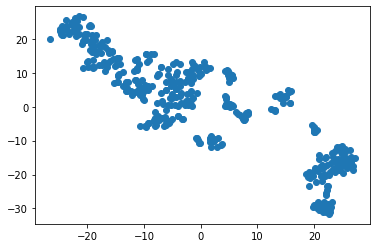

In [34]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

#### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [26]:
from sklearn.cluster import KMeans

In [39]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [40]:
train_labels = model.fit_predict(X_train_scaled)

In [41]:
pd.value_counts(train_labels)

2    191
1    127
0     86
dtype: int64

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Text(-15, -10, 'Кластер 2')

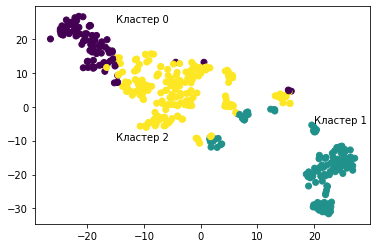

In [47]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.text(-15, 25, 'Кластер 0')
plt.text(20, -5, 'Кластер 1')
plt.text(-15, -10, 'Кластер 2')

Вычислите средние значения price и CRIM в разных кластерах.

In [48]:
y_train[train_labels==0].mean()

price    27.788372
dtype: float64

In [49]:
y_train[train_labels==1].mean()

price    16.165354
dtype: float64

In [50]:
y_train[train_labels==2].mean()

price    24.958115
dtype: float64

In [51]:
X_train.loc[train_labels==0, 'CRIM'].mean()

0.07356558139534886

In [52]:
X_train.loc[train_labels==1, 'CRIM'].mean()

10.797028425196853

In [53]:
X_train.loc[train_labels==2, 'CRIM'].mean()

0.42166020942408367